# Loading the libraries

In [1]:
%matplotlib inline
# %matplotlib notebook
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import *
from google.colab import drive
# import matplotlib
# matplotlib.use('TkAgg') 
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the Data

In [ ]:
# Loading train data
path = '/content/drive/MyDrive/Capstone/Features_Data.csv'
train_df = pd.read_csv(path)
print("Train Data: ", train_df.shape)
Y = np.array((train_df['Response'].map(int)-1))
X = np.array(train_df.drop(['Response', 'new_response'], axis=1))

# Train Test Split 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, 
                                                    stratify=Y,
                                                    test_size=0.2,
                                                    random_state=42)   
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(train_y.reshape(-1, 1))
train_y_encoded = enc.transform(train_y.reshape(-1, 1)).toarray()
test_y_encoded = enc.transform(test_y.reshape(-1, 1)).toarray()

Train Data:  (59381, 136)


In [ ]:
# Loading updated features data
path = '/content/drive/MyDrive/Capstone/Features_Data.csv'
train_df = pd.read_csv(path)
print("Train Data: ", train_df.shape)
Y = np.array((train_df['new_response'].map(int)))
X = np.array(train_df.drop(['Response', 'new_response'], axis=1))

# Train Test Split 
from sklearn.model_selection import train_test_split
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, Y, 
                                                        stratify=Y,
                                                    test_size=0.2, random_state=42)   
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(train_y2.reshape(-1, 1))
train_y2_encoded = enc.transform(train_y2.reshape(-1, 1)).toarray()
test_y2_encoded = enc.transform(test_y2.reshape(-1, 1)).toarray()

Train Data:  (59381, 136)


### Evaluation Metrics

In [ ]:
def evaluationMetrics(y_test, y_pred):
    ''' Computes evaluation metrics like Accuracy, Precision, Recall and F1 Score.
    Args:
          y_test - True labels.
          y_pred - Predicted labels.
    Returns:
          result - Json consisiting of evaluation metrics.
    '''
    result = {}
    result['Accuracy'] = round(accuracy_score(y_test, y_pred), 2)
    result['Precision_weighted'] = round(precision_score(y_test, 
                                         y_pred, average='weighted'), 2)
    result['Recall_weighted'] = round(recall_score(y_test, y_pred,
                                      average='weighted'), 2)
    result['F1 Score_weighted'] = round(f1_score(y_test, y_pred, 
                                        average='weighted'), 2)
    result['Precision_micro'] = round(precision_score(y_test, y_pred, 
                                      average='micro'), 2)
    result['Recall_micro'] = round(recall_score(y_test, y_pred, 
                                   average='micro'), 2)
    result['F1 Score_micro'] = round(f1_score(y_test, y_pred, 
                                     average='micro'), 2)
    return result

In [ ]:
def plotCurve(history, no_epochs):
  ''' Plots training and test curve for the evaluation metrics like Accuracy, 
  Loss, Recall, Precision, AUC and crossentropy loss..
    Args:
          history - Evaluation metrics recorded during each epoch.
          no_epochs - Number of epochs used while training. 
    '''
  fig, axes = plt.subplots(3, 2, figsize = (15, 15))
  print("Plotting")
  epochs = list(range(0, no_epochs))
  sns.lineplot(epochs, history.history['accuracy'], 
              label = 'Training_acc', ax = axes[0][0])
  sns.lineplot(epochs, history.history['val_accuracy'], 
              label = 'Test_acc', ax = axes[0][0])

  sns.lineplot(epochs, history.history['loss'], 
              label = 'Training_loss', ax = axes[0][1])
  sns.lineplot(epochs, history.history['val_loss'], 
              label = 'Test_loss', ax = axes[0][1])

  sns.lineplot(epochs, history.history['auc'], 
              label = 'Training_AUC', ax = axes[1][0])
  sns.lineplot(epochs, history.history['val_auc'], 
              label = 'Test_AUC', ax = axes[1][0])

  sns.lineplot(epochs, history.history['precision'], 
              label = 'Training_Precision', ax = axes[1][1])
  sns.lineplot(epochs, history.history['val_precision'], 
              label = 'Test_Precision', ax = axes[1][1])

  sns.lineplot(epochs, history.history['recall'], 
              label = 'Training_Recall', ax = axes[2][0])
  sns.lineplot(epochs, history.history['val_recall'], 
              label = 'Test_Recall', ax = axes[2][0])
  
  
  sns.lineplot(epochs, history.history['categorical_crossentropy'], 
              label = 'Training_Categorical_Crossentropy', ax = axes[2][1])
  sns.lineplot(epochs, history.history['val_categorical_crossentropy'], 
              label = 'Test_Categorical_Crossentropy', ax = axes[2][1])

  axes[0][0].set(xlabel = 'Epochs', ylabel = 'Accuracy')
  axes[0][0].set_title("Training & Test Accuracy Curve")

  axes[0][1].set(xlabel = 'Epochs', ylabel = 'Loss')
  axes[0][1].set_title("Training & Test Loss Curve")

  axes[1][0].set(xlabel = 'Epochs', ylabel = 'AUC')
  axes[1][0].set_title("Training & Test AUC Curve")

  axes[1][1].set(xlabel = 'Epochs', ylabel = 'Precision')
  axes[1][1].set_title("Training & Test Precision Curve")

  axes[2][0].set(xlabel = 'Epochs', ylabel = 'Recall')
  axes[2][0].set_title("Training & Test Recall Curve")

  axes[2][1].set(xlabel = 'Epochs', ylabel = 'Categorical Crossentropy')
  axes[2][1].set_title("Training & Test Categorical Crossentropy Curve")

  plt.show()

In [ ]:
def displayResults(test_y,pred_y, history, no_epochs, make_plots):
  ''' Displays evalutation metrics, classification report and training test curve.
    Args:
          y_test - True labels.
          pred_y - Predicted labels.
          history - Evaluation metrics recorded during each epoch.
          no_epochs - Number of epochs used while training. 
    Returns:
          result - Json consisiting of evaluation metrics.
  '''
  metrics = evaluationMetrics(test_y, pred_y)
  if make_plots == False:
    if metrics['Accuracy'] < 0.7:
      print("Evaluation Metrics: ")
      for key,val in metrics.items():
        print(key, " : ", val)
      print("-"*40)
      return False
      
  print("Evaluation Metrics: ")
  for key,val in metrics.items():
      print(key, " : ", val)
  print("-"*40)

  report = classification_report(test_y, pred_y)
  print("-"*40)
  print("Classification Report: ")
  print(report)
  print("-"*40)
  plotCurve(history, no_epochs)
  return True


### Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
def applyPCA(no_comp, train_x, train_y, test_x):
  ''' Applies PCA to reduce the dimenssion of the data
    Args:
          no_comp - Number of PCA components to be returned.
          train_x - Train features.
          train_y - Target variable.
          test_x - Test Features
    Returns:
          train_x, test_x - Returns reduced train and test features.
  '''
  pca = PCA(n_components=no_comp).fit(train_x, train_y)
  train_x = pca.transform(train_x)
  test_x = pca.transform(test_x)

  return train_x, test_x


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

def applyRFE(no_fea, train_x, train_y, test_x):
  ''' Applies Recurrsive Feature Elimination to reduce the dimenssion of the data
    Args:
          no_comp - Number of PCA components to be returned.
          train_x - Train features.
          train_y - Target variable.
          test_x - Test Features
    Returns:
          train_x, test_x - Returns reduced train and test features.
  '''
  estimator = SVR(kernel="linear")
  selector = RFE(estimator, n_features_to_select=no_fea, step=10)
  selector = selector.fit(train_x, train_y)
  train_x = selector.transform(train_x)
  test_x = selector.transform(test_x)
  return train_x, test_x

### Shallow Neural Network

In [ ]:
def shallow_network(no_target_classes, no_epochs, train_x, 
                    train_y_encoded, test_x, test_y_encoded, test_y, make_plots):
  ''' Defines and compiles a shallow neural network with softmax function on 
  the output layer. Records the evaluation metrics for each epoch, predicts
  results and computes evaluation metrics. 
    Args:
          no_target_classes - Number of classes present in the target variable. 
          no_epochs - Number of epochs used while training. 
          train_x - Features array used for training. 
          train_y_encoded - One hot encoded target variable for the training data.
          test_x - Features array used for test data.
          test_y_encoded - One hot encoded target variable for the test data.
          test_y - Target variable. 
    '''
  print("Number of Epochs: ", no_epochs)
  nn_model = Sequential([
    Dense(136, input_shape=(train_x.shape[1],), activation='relu'),
    Dense(68, activation='relu'),
    Dense(no_target_classes, activation='softmax')])
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
  metrics = ['AUC', 'Precision', 'Recall', 'accuracy', 
             'categorical_crossentropy'])
  print("Model Summary: ")
  nn_model.summary()
  # Fitting the model
  history = nn_model.fit(train_x, train_y_encoded, epochs=no_epochs, 
                         batch_size=32, validation_data=(test_x, test_y_encoded))
  # Predicting the label
  nn_pred = nn_model.predict(test_x)
  nn_pred = pd.DataFrame(nn_pred)
  nn_pred['label']= nn_pred.idxmax(axis=1)
  if displayResults(test_y,nn_pred['label'], history, no_epochs, make_plots):
    return True
  else:
    return False

#### Running on Full dataset with 8 Risk Levels

In [ ]:
no_epochs = 20
no_classes = 8
make_plots = True
res = shallow_network(no_classes, no_epochs, train_x, 
                train_y_encoded, test_x, test_y_encoded, test_y, make_plots)

Number of Epochs:  20
Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 136)               18360     
                                                                 
 dense_1 (Dense)             (None, 68)                9316      
                                                                 
 dense_2 (Dense)             (None, 8)                 552       
                                                                 
Total params: 28,228
Trainable params: 28,228
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1485/1485 [==============================] - 9s 5ms/step - loss: 1.8380 - auc: 0.7626 - precision: 0.5677 - recall: 0.1790 - accuracy: 0.3787 - categorical_crossentropy: 1.8380 - val_loss: 1.7853 - val_auc: 0.7739 - val_precision: 0.5300 - val_recall: 0.1597 - val_ac

#### Running on Full dataset with 3 Risk Levels

Number of Epochs:  20
Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 136)               18360     
                                                                 
 dense_4 (Dense)             (None, 68)                9316      
                                                                 
 dense_5 (Dense)             (None, 3)                 207       
                                                                 
Total params: 27,883
Trainable params: 27,883
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1485/1485 [==============================] - 8s 4ms/step - loss: 1.1051 - auc: 0.7092 - precision: 0.5555 - recall: 0.4350 - accuracy: 0.5279 - categorical_crossentropy: 1.1051 - val_loss: 1.0314 - val_auc: 0.6939 - val_precision: 0.5106 - val_recall: 0.3839 - val_

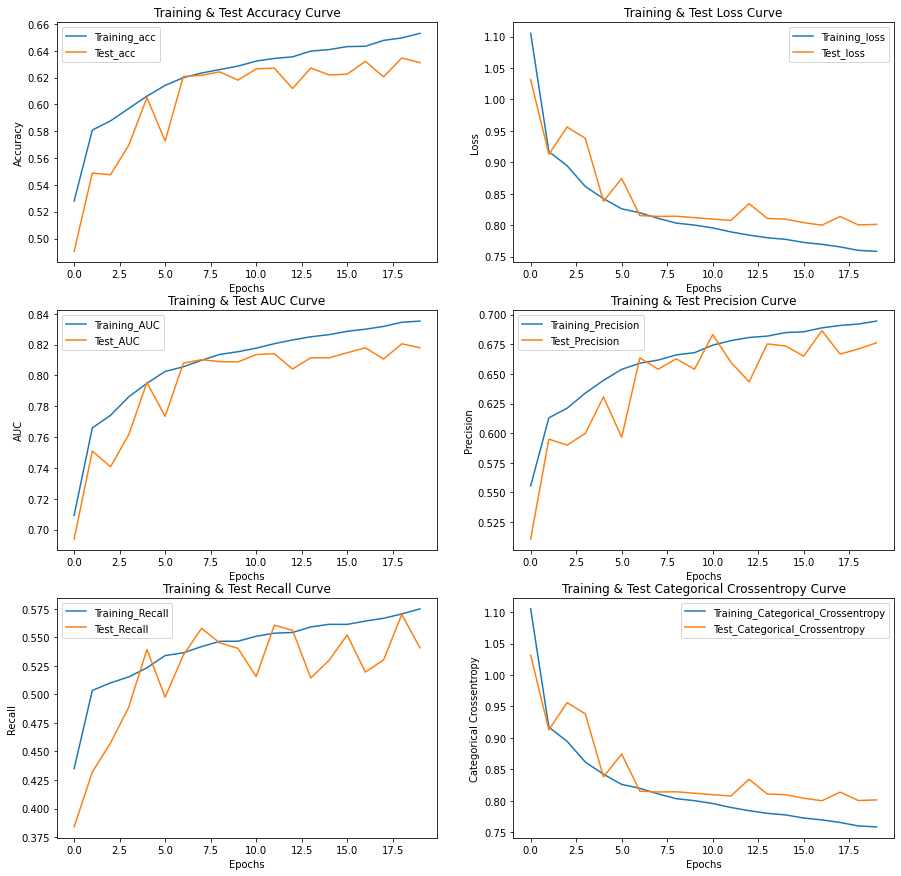

In [ ]:
no_epochs = 20
no_classes = 3
make_plots = True
res = shallow_network(no_classes, no_epochs, train_x2, 
                train_y2_encoded, test_x2, test_y2_encoded, test_y2, make_plots)

#### Running on reduced dataset using PCA with 8 Risk Levels

In [ ]:
# Applying shallow network by reducing the dimensionality using PCA
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyPCA(no_comp, train_x, train_y, test_x)
  no_epochs = 10
  no_classes = 8
  make_plots = False
  res = shallow_network(no_classes, no_epochs, train_x_pca, 
                  train_y_encoded, test_x_pca, test_y_encoded, test_y, make_plots)
  

Number of features used : 10
Number of Epochs:  10
Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 136)               1496      
                                                                 
 dense_4 (Dense)             (None, 68)                9316      
                                                                 
 dense_5 (Dense)             (None, 8)                 552       
                                                                 
Total params: 11,364
Trainable params: 11,364
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1485/1485 [==============================] - 8s 4ms/step - loss: 1.9678 - auc: 0.7214 - precision: 0.4648 - recall: 0.1085 - accuracy: 0.3216 - categorical_crossentropy: 1.9678 - val_loss: 1.7792 - val_auc: 0.7476 - val_precision: 0.617

#### Running on reduced dataset using PCA with 3 Risk Levels

In [ ]:
# Applying shallow network by reducing the dimensionality using PCA
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyPCA(no_comp, train_x2, train_y2, test_x2)
  no_epochs = 10
  no_classes = 3
  make_plots = False
  res = shallow_network(no_classes, no_epochs, train_x_pca, 
                  train_y2_encoded, test_x_pca, test_y2_encoded, test_y2, make_plots)
  

Number of features used : 10
Number of Epochs:  10
Model Summary: 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 136)               1496      
                                                                 
 dense_16 (Dense)            (None, 68)                9316      
                                                                 
 dense_17 (Dense)            (None, 3)                 207       
                                                                 
Total params: 11,019
Trainable params: 11,019
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1485/1485 [==============================] - 7s 4ms/step - loss: 1.1802 - auc: 0.6356 - precision: 0.4737 - recall: 0.3288 - accuracy: 0.4527 - categorical_crossentropy: 1.1802 - val_loss: 1.2177 - val_auc: 0.6115 - val_precision: 0.430

#### Running on reduced dataset using RFE with 8 Risk Levels

In [ ]:
# Applying shallow network by reducing the dimensionality using RFE
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyRFE(no_comp, train_x, train_y, test_x)
  no_epochs = 10
  no_classes = 8
  make_plots = False
  res = shallow_network(no_classes, no_epochs, train_x_pca, 
                  train_y_encoded, test_x_pca, test_y_encoded, test_y, make_plots)
  

#### Running on reduced dataset using RFE with 3 Risk Levels

In [ ]:
# Applying shallow network by reducing the dimensionality using RFE
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyRFE(no_comp, train_x2, train_y2, test_x2)
  no_epochs = 10
  no_classes = 3
  make_plots = False
  res = shallow_network(no_classes, no_epochs, train_x_pca, 
                  train_y2_encoded, test_x_pca, test_y2_encoded, test_y2, make_plots)
  applyRFE

### Dense Neural Networks

In [ ]:
def dense_network(no_target_classes, no_epochs, train_x, 
                    train_y_encoded, test_x, test_y_encoded, test_y, make_plots):
  ''' Defines and compiles a dense neural network with softmax function on 
  the output layer. The network has 5 hidden layers with Relu as the activation 
  fucntion. Records the evaluation metrics for each epoch, predicts
  results and computes evaluation metrics. 
    Args:
          no_target_classes - Number of classes present in the target variable. 
          no_epochs - Number of epochs used while training. 
          train_x - Features array used for training. 
          train_y_encoded - One hot encoded target variable for the training data.
          test_x - Features array used for test data.
          test_y_encoded - One hot encoded target variable for the test data.
          test_y - Target variable. 
    '''
  print("Number of Epochs: ", no_epochs)
  nn_model = Sequential([
    Dense(136, input_shape=(train_x.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(136, activation='relu'),
    Dense(68, activation='relu'),
    Dense(68, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(no_target_classes, activation='softmax'),
  ])
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
  metrics = ['AUC', 'Precision', 'Recall', 'accuracy', 
             'categorical_crossentropy'])
  print("Model Summary: ")
  nn_model.summary()
  # Fitting the model
  history = nn_model.fit(train_x, train_y_encoded, epochs=no_epochs, 
                         batch_size=32, validation_data=(test_x, test_y_encoded))
  # Predicting the label
  nn_pred = nn_model.predict(test_x)
  nn_pred = pd.DataFrame(nn_pred)
  nn_pred['label']= nn_pred.idxmax(axis=1)
  if displayResults(test_y,nn_pred['label'], history, no_epochs, make_plots):
    return True
  else:
    return False

#### Running on Full dataset with 8 Risk Levels

In [ ]:
no_epochs = 20
no_classes = 8
make_plots = True
res = dense_network(no_classes, no_epochs, train_x, 
                train_y_encoded, test_x, test_y_encoded, test_y, make_plots)

Number of Epochs:  20
Model Summary: 
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 136)               18360     
                                                                 
 dropout (Dropout)           (None, 136)               0         
                                                                 
 dense_28 (Dense)            (None, 136)               18632     
                                                                 
 dense_29 (Dense)            (None, 68)                9316      
                                                                 
 dense_30 (Dense)            (None, 68)                4692      
                                                                 
 dropout_1 (Dropout)         (None, 68)                0         
                                                                 
 dense_31 (Dense

#### Running on Full dataset with 3 Risk Levels

In [ ]:
no_epochs = 20
no_classes = 3
make_plots = True
res = dense_network(no_classes, no_epochs, train_x2, 
                train_y2_encoded, test_x2, test_y2_encoded, test_y2, make_plots)

Number of Epochs:  20
Model Summary: 
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 136)               18360     
                                                                 
 dropout_3 (Dropout)         (None, 136)               0         
                                                                 
 dense_35 (Dense)            (None, 136)               18632     
                                                                 
 dense_36 (Dense)            (None, 68)                9316      
                                                                 
 dense_37 (Dense)            (None, 68)                4692      
                                                                 
 dropout_4 (Dropout)         (None, 68)                0         
                                                                 
 dense_38 (Dens

#### Running on reduced dataset using PCA with 8 Risk Levels

In [ ]:
# Applying dense network by reducing the dimensionality using PCA
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyPCA(no_comp, train_x, train_y, test_x)
  no_epochs = 10
  no_classes = 8
  make_plots = False
  res = dense_network(no_classes, no_epochs, train_x_pca, 
                  train_y_encoded, test_x_pca, test_y_encoded, test_y, make_plots)

Number of features used : 10
Number of Epochs:  10
Model Summary: 
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 136)               1496      
                                                                 
 dropout_6 (Dropout)         (None, 136)               0         
                                                                 
 dense_42 (Dense)            (None, 136)               18632     
                                                                 
 dense_43 (Dense)            (None, 68)                9316      
                                                                 
 dense_44 (Dense)            (None, 68)                4692      
                                                                 
 dropout_7 (Dropout)         (None, 68)                0         
                                                    

#### Running on reduced dataset using PCA with 3 Risk Levels

In [ ]:
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyPCA(no_comp, train_x2, train_y2, test_x2)
  no_epochs = 10
  no_classes = 3
  make_plots = False
  res = dense_network(no_classes, no_epochs, train_x_pca, 
                  train_y2_encoded, test_x_pca, test_y2_encoded, test_y2, make_plots)
  

Number of features used : 10
Number of Epochs:  10
Model Summary: 
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 136)               1496      
                                                                 
 dropout_18 (Dropout)        (None, 136)               0         
                                                                 
 dense_70 (Dense)            (None, 136)               18632     
                                                                 
 dense_71 (Dense)            (None, 68)                9316      
                                                                 
 dense_72 (Dense)            (None, 68)                4692      
                                                                 
 dropout_19 (Dropout)        (None, 68)                0         
                                                    

#### Running on reduced dataset using RFE with 8 Risk Levels

In [ ]:
# Applying dense network by reducing the dimensionality using RFE
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyRFE(no_comp, train_x, train_y, test_x)
  no_epochs = 10
  no_classes = 8
  make_plots = False
  res = dense_network(no_classes, no_epochs, train_x_pca, 
                  train_y_encoded, test_x_pca, test_y_encoded, test_y, make_plots)
  

Number of features used : 10


#### Running on reduced dataset using RFE with 3 Risk Levels

In [ ]:
# Applying dense network by reducing the dimensionality using RFE
no_features = [10, 20, 40, 60]
for no_comp in no_features:
  print("="*40)
  print("Number of features used :", no_comp)
  train_x_pca, test_x_pca = applyRFE(no_comp, train_x2, train_y2, test_x2)
  no_epochs = 10
  no_classes = 3
  make_plots = False
  res = dense_network(no_classes, no_epochs, train_x_pca, 
                  train_y2_encoded, test_x_pca, test_y2_encoded, test_y2, make_plots)
  applyRFE